# Az északi manysi _ӯнлы_ 'ül' jelentésű ige vizsgálata
A példamondatokat és a hozájuk tartozó annotációkat tartalmazó data.xls dokumentumból az Exel export funkciójával létrehoztam a raw_data.csv fájlt. A cirill betűs oszlopok nélküli verziót használtam az elemzés során. 

In [1]:
%matplotlib inline
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import csv

data = pd.read_csv('raw_data.csv', encoding='Latin-1', sep=';')

## Leíró statisztikák
Kérdések a korpuszban megjelenő finit, nem tagadó _ӯнлы_-ról:

**1)** hányszor jelenik meg **összesen** és a **stílusrétegekben**
_Van különbség az ige gyakoriságában? A beszédszituáció nagyban meghatározza az ige előfordulását, de azért lehetnek nagyságrendi eltérések._

**2)** hány **adtközlőtől** származnak a példák
_Ha csak néhány adatközlő produkálja az előfordulások többségét, akkor kevésbé megbízható az anyag. Volt olyan adatközlő, akitől többféle stílusból is származott példa?_ 

**3)** a különböző **jelentések gyakorisága** a teljes korpuszban
_Mennyire gyakoriak az egyes jelentések? Melyik a leggyakoribb jelentés és melyekből taláni csak néhányat?_ 

**4)** mely **szerkezettípusokban** jelenik meg a leggyakrabban az ige 
_Önálló állítmányként, kvázikopulaként vagy modifikátorként?_

**5)** mi mondható el az ige **alanyáról**

**5a)** Ha az összes előfordulást nézük, akkor **milyen ojektumok szerepelnek alanyi funkcióban**? _Hogyan lehet csoportosítani ezeket az alanyokat? Igaz, hogy az élettelen alanyok esetében a test geometriai formája határozza meg, hogy mi 'ül'? Van eltérés az alanyok csoportjai között a **stílusokban**?_

**5b)** milyenek az alanyok az **élőséggel** kapcsolatban? _Melyik csoport gyakoribb?_

**5c)** mi az alany **szófaja** a megjelent példákban? _Valóban gyakopribb az NP-vel kifejezett alany, mint zéró vagy névmási anaforával?_

**6)** mi mondható el a példákban szereplő **igealakokról**? 

**6a)** érdekességképpen a jelen vagy a múlt **idő** gyakoribb a korpuszban?

**6b)** a megjelent példák igéinek mekkora része **képzős**? _Mely képzők jelennek meg és lehetséges-e, hogy csupán egy-egy adatközlő használja ezeket a képzős alakokat?_

### 1) A kutatásban felhasznált nyelvi példák száma _stílusrétegek_ szerint
A korpuszban összesen 324 darab finit, nem tagadó alakú 'ül' jelentésű ige realizálódott. 
A legtöbb példa a publicisztikákból (pub) származik, majd a mesékből, beszédből, a legkevesebb pedig a versekből. 
Bár a stílusok alkorpuszai közt nagyságrendi eltérések voltak (az újságcikk 1153 oldalnyi, a mese 193 oldalnyi, a beszéd 30 oldalnyi, a vers pedig 35 oldalnyi terjedelmű volt), a mesékben található példák száma több mint fele a publicisztikai stílusban találhatóknak - vagyis a mesékben gyakoribb volt az ige, mint az újságcikkekben. 
A másik két sítílusból csekély számú példát adatoltam, vagyis csupán arra adnak módot, hogy azt mondhassuk, hogy bizonyos jelentésekben előfordul az 'ül'.

a korpuszban található finit, nem tagadó alakú unli igék száma:  324
az egyes stílusokból származó példák száma (db):  pub     195
mese    109
besz     13
vers      7
Name: style, dtype: int64


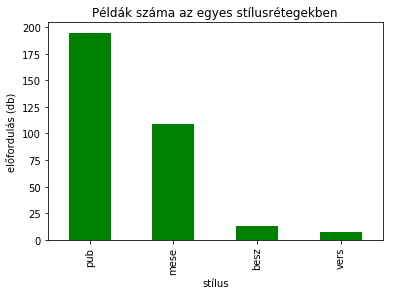

In [2]:
print('a korpuszban található finit, nem tagadó alakú unli igék száma: ', data['style'].count())
print_data = data['style'].value_counts()
print('az egyes stílusokból származó példák száma (db): ', print_data)

plt.title('Példák száma az egyes stílusrétegekben')
plt.xlabel('stílus')
plt.ylabel('előfordulás (db)')
ax = print_data.plot.bar(color='green')

### 2) Az 'ül' igét használó _adatközlők_ példáinak száma
A korpuszban található előfordulások 39 beszélőtől származtak (ahol két adatközlő van megadva, ott az történt, hogy az interjúalany (1. név) manysiul beszélt, de a szöveget egy újságíró (2. név) írta le). 

11 beszélő produkált 10-nél több előfordulást és 12 beszélőtől mindössze 1-1 példát adatoltam.

a nyelvi példákat közlő informánsok száma:  39
az egyes beszélőktől származó példák száma: Rombandejeva, Svetlana                     41
Merov, Nikolay                             36
Hatanjev, Pjotr                            31
Merova, Tamara                             20
Tjetkina, Ljudmilla                        18
Algadjeva, Varvara                         17
Hozumova, Valentina                        15
Sambindalova, Darja                        15
Vasiljeva, Valentina                       14
Kugin, Pjotr                               12
Dinislamova, Svetlana                      10
Merova, Marija; Nikitin, Nikolay            9
Hozumova, Svetlana                          9
Algadjeva, Anna                             7
Kondina, Galina                             7
Vjutkin, Aleksandr                          6
Rukova, Uljana                              5
Algadjeva, Ljudmila                         5
Anjamova, Aleksandra                        5
Tasmanova, Ljudmilla               

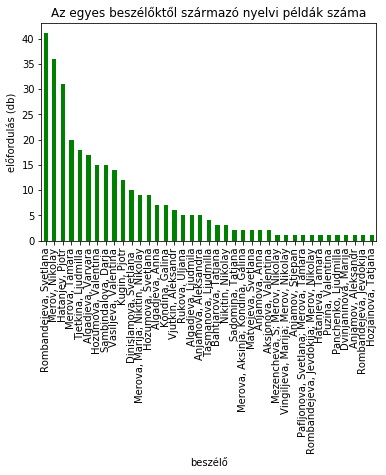

In [3]:
print_data = data['speaker'].value_counts()
print('a nyelvi példákat közlő informánsok száma: ', print_data.count())
print('az egyes beszélőktől származó példák száma:', print_data)

plt.title('Az egyes beszélőktől származó nyelvi példák száma')
plt.xlabel('beszélő')
plt.ylabel('előfordulás (db)')
ax = print_data.plot.bar(color='green')

Az adatközlők közül 8 személytől **elérhető volt különböző stílusrétegből származó szöveg is**: 3 fő pub+mese, 1 főnél pub+ beszéd, 1 főnél pub+vers, 2 főnél mese+beszéd, 1 főnél pedig pub+vers+beszéd stílusból is vizsgáltam adatot.

In [4]:
print_data = data.groupby('speaker')

print('az egyes adatközlők különböző stílusrétegekben produkált előfordulásainak száma:', 
      print_data['style'].value_counts())

az egyes adatközlők különböző stílusrétegekben produkált előfordulásainak száma: speaker                                  style
Aksjonova, Valentina                     mese      1
                                         pub       1
Algadjeva, Anna                          mese      6
                                         pub       1
Algadjeva, Ljudmila                      pub       5
Algadjeva, Varvara                       mese     17
Anjamov, Aleksandr                       pub       1
Anjamov, Stjepan                         mese      1
Anjamova, Aleksandra                     mese      5
Anjamova, Anna                           pub       2
Bahtjarova, Tatjana                      vers      2
                                         pub       1
Dinislamova, Svetlana                    besz      4
                                         vers      4
                                         pub       2
Dvinjaninova, Marija                     mese      1
Hatanjev, Pjotr         

A stílusrétegek beszélőinek egy főre eső példája informatív?

In [5]:
print_data = data[['style', 'speaker']]
print_data = print_data.groupby('style')
print_data = print_data['speaker'].value_counts()
print(print_data)

style  speaker                                
besz   Rukova, Uljana                              5
       Dinislamova, Svetlana                       4
       Kugin, Pjotr                                1
       Merova, Tamara                              1
       Panchenko, Ljudmilla                        1
       Sadomina, Tatjana                           1
mese   Hatanjev, Pjotr                            31
       Algadjeva, Varvara                         17
       Sambindalova, Darja                        15
       Kugin, Pjotr                               11
       Merova, Marija; Nikitin, Nikolay            9
       Algadjeva, Anna                             6
       Anjamova, Aleksandra                        5
       Kondina, Galina                             2
       Aksjonova, Valentina                        1
       Anjamov, Stjepan                            1
       Dvinjaninova, Marija                        1
       Hozjainova, Tatjana                         1

### 3) Az _ӯнлы_ különböző jelentéseinek gyakorisága
Először is, az _ӯнлы_ jelentéseit tekintve a 'van' jelentés volt a leggyakoribb a korpuszban (133 db, az összes előfordulás 41,1%-a) tisztán 'van' értelmű, de ezen kívül 22 db olyan előfordulás is volt, ahol ugyan kérdéses volt, hogy 'ül' vagy 'van' (mivel az alany élő volt). Ezekben az esetekben a mondat elemzése többféle is lehet (pl. _Belépett a házba, a felesége ott ül._ mondatban az ige 'ül' vagy 'van' (kopula) jelentésű). Az ilyen esetekben erősödhet a kvázikopula funkció azáltal, hogy egyszerre mindkét jelentéstartalom aktiválódik.

A második leggyakoribb jelentés az 'ül' (összesen 97 db mást nem jelentő, nem kétséges példát adatoltam): 59 db (18,2%) esetében az ige pusztán testtartást fejezett ki. 38 előfordulásnál ugyan az ige jelentése 'ül' volt, mégis a szerkezet kifejezte, hogy az alany(ok) egy huzamosabb időt töltöttek együtt, vagyis úgy volt folyamatos aspektusú, hogy azt külön az egyik összetevő sem kódolta.

A két jelentés közt összesen 35 esetben nem tudtam egyértelműen dönteni(22 van/ül + 14 ül/van). 

A 3. leggyakoribb jelentés a 'valamilyen szempontból inaktív, passzív' volt (14 db). Igen gyakoriak voltak azok az esetek, amikor nem tudtam eldönteni, hogy az 'ül' vagy az 'inaktív' jelentéstartalom-e az elsődleges - ilyenkor többnyire mindkét jelentéstartalom aktiválódott. Voltak olyan esetek, amelyeknél még akkor is, ha az alany referencia testtartására történt utalás, nem ezt kódolta elsődlegesen (6 db), illetve olyanok is, melyek a testtartás kódolása mellett még az alany passzivitását is kifejezi (13 db).  

A többi jelentést relatíve kevés esetben adatoltam: 
a modifikátori szerepű ige (12 db), az 'él'(10 db), az elrendeződik (2 db), a 'tesz' jelentés megléte pedig csak egyetlen példával támasztható alá.

az egyes jelentéstartalmak példáinak száma (db):  van             132
ül               60
ül/idõt tölt     37
van/ül           22
inaktív          16
ül/van           14
ül/inaktív       13
mod              12
él               10
inaktív/ül        6
elrendezõdik      2
Name: V_meaning, dtype: int64


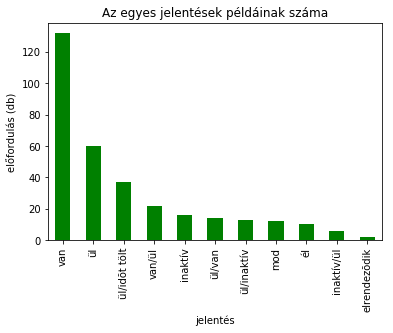

In [6]:
print_data = data['V_meaning'].value_counts()
print('az egyes jelentéstartalmak példáinak száma (db): ', print_data)

plt.title('Az egyes jelentések példáinak száma')
plt.xlabel('jelentés')
plt.ylabel('előfordulás (db)')
ax = print_data.plot.bar(color='green')

A **'van' jelentés** megközelítően azonos arányban jelent meg **lokatív szerkezetben** (48 db, 36,1%), **egzisztenciális szerkezetben** (43 db, 32,3%), illetve **egyéb kopulafunkcióban** (42 db, 31,9%).

A **van/ül jelentésben** egz: 9db, lok: 6db, kop: 4db, hal: 3db, az **ül/van jelentésben** egz: 9db, lok: 4db, kop: 1db

Az **összes 'ül'és'van' jelentésűeknél**: egz: 61db, lok: 59db, kop: 46 db, hal: 3db

az egyes jelentéstartalmak példáinak száma (db):  egz    61
loc    51
kop    20
Name: cons, dtype: int64


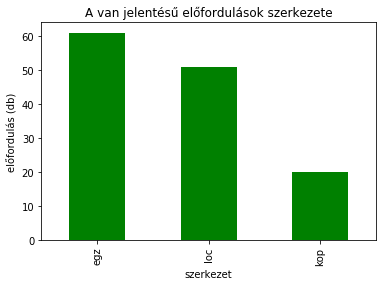

In [7]:
print_data = data[data['V_meaning'] == 'van']
print_data = print_data['cons'].value_counts()
print('az egyes jelentéstartalmak példáinak száma (db): ', print_data)

plt.title('A van jelentésű előfordulások szerkezete')
plt.xlabel('szerkezet')
plt.ylabel('előfordulás (db)')
ax = print_data.plot.bar(color='green')

az egyes jelentéstartalmak példáinak száma (db):  egz/sim    10
loc/sim     7
hal         3
kop/sim     2
Name: cons, dtype: int64


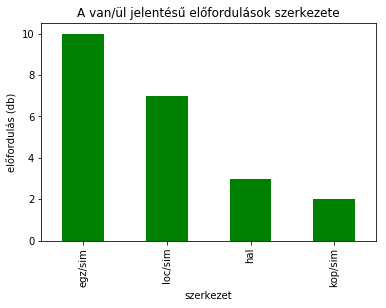

In [8]:
print_data = data[data['V_meaning'] == 'van/ül']
print_data = print_data['cons'].value_counts()
print('az egyes jelentéstartalmak példáinak száma (db): ', print_data)

plt.title('A van/ül jelentésű előfordulások szerkezete')
plt.xlabel('szerkezet')
plt.ylabel('előfordulás (db)')
ax = print_data.plot.bar(color='green')

az egyes jelentéstartalmak példáinak száma (db):  sim/egz    9
sim/loc    4
sim/kop    1
Name: cons, dtype: int64


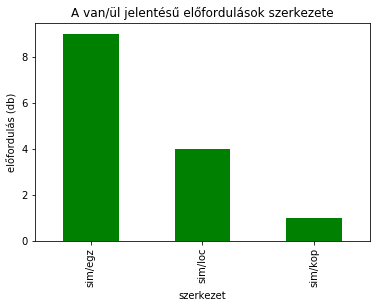

In [9]:
print_data = data[data['V_meaning'] == 'ül/van']
print_data = print_data['cons'].value_counts()
print('az egyes jelentéstartalmak példáinak száma (db): ', print_data)

plt.title('A van/ül jelentésű előfordulások szerkezete')
plt.xlabel('szerkezet')
plt.ylabel('előfordulás (db)')
ax = print_data.plot.bar(color='green')

### 4) Az _ӯнлы_ megjelenésének gyakorisága a szerkezettípusokban
Az összes előfordulást nézve az ige közel annyi esetben volt önálló állítmány (sim+ger+hal), mint segédige: 49%-ban önálló, 47,5%-ban kopula (loc+egz+kop), 3,5%-ban modifikátor (mod). A segédigék tehát összesen 51%-ot tettek ki. (A 'tiszta'=egyértelmű esetek, a 'vegyes'=a több jelentéstartalmat aktivált eseteket az elsődlegesként meghatározott jelentésükhöz számoltam - A példák 10,2%-ában nem tudtam dönteni az önálló vagy kopulahasználat mellett (33 db)):
		tiszta	vegyes
önálló	sim	92	106
	hal	40	40
	ger	11	11
kopula	loc	48	54
	egz	43	52
	kop	42	46
modifikátor	pár	12	12
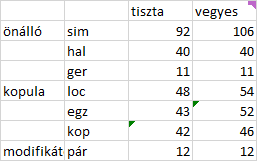

az egyes jelentéstartalmak példáinak száma (db):  sim        97
egz        61
loc        51
hal        40
kop        20
ger        11
pár        11
egz/sim    10
sim/egz     9
loc/sim     7
sim/loc     4
kop/sim     2
sim/kop     1
Name: cons, dtype: int64


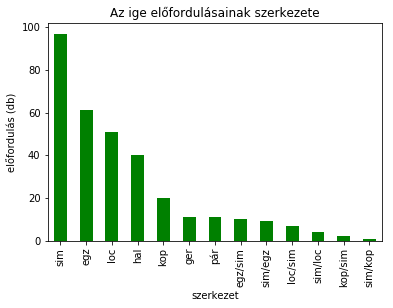

In [10]:
print_data = data['cons'].value_counts()
print('az egyes jelentéstartalmak példáinak száma (db): ', print_data)

plt.title('Az ige előfordulásainak szerkezete')
plt.xlabel('szerkezet')
plt.ylabel('előfordulás (db)')
ax = print_data.plot.bar(color='green')

### 5) Az ige alanyainak attribútumai
#### 1) Az alanyok általában
A korpuszban megjelent példamondatok alanyait tekintve azt látjuk, hogy 64 különböző objektum jelenik meg, a leggyakoribb token a 'ház' (49 db) és a 'falu' (41 db) volt. 10-nél többször ezen felül a 'nép, emberek, tömeg' jelentésú token jelent meg, valamint a személyes névmások és emberre utaló zéró anaforák (ezeket takarja a _személy_ kód). 25 jelentés fordult elő több mint 1 alkalommal. 

Elmondható, hogy a **legtöbbször emberi alannyal** jelent meg az 'ül' testtartásige: a személy mellett a 'nép, tömeg' (12 db), fiú (9), gyerek (9), ember (7), férfi (6), anya (5), lány (3), szülő (3), apa 3), gazda (3), fejedelem (2), feleség (2), asszony (2), nő (2), felnőtt (1), sógor, nővér, báty, nagyanya, nagyapa is embert jelent. 

A második leggyakoribb csoport az **élettelen tárgyak**é volt, mintegy 29 különböző objektum jelent meg:
    1) többféle _településtípus_ (falu, város), 
    2) többféle _épülettípus_ (ház, erdei_ház, szálloda, istálló, szentély, lakhely),
    3) _természeti képződmény_ (hegy, vízállás), 
    4) _lábbal, talppal rendelkező dolog_ (sítalp, asztal, autó), 
    5) valamilyen _tartályszerű_ forma (csésze, csésze-doboz, edény, nyírhély edény, zsák, bölcsõ, ruhanemű, háló), 
    6) _közlekedési eszköz_ (csónak, (autó, sítalp)), 
    7) _testrész_ (fej, (kacsa)toll, (kacsa)csont,
    8) _megszámláhatatlan tömeg_ (halom, zsír), 
    9) _intézmény_ (iskola), 
    10) _egyéb_ (fadarab)

Az **egyéb élőlények** közé soroltam: 
    1) _állatok_ (holló (4), medve (2), mókus (1), állat, csuka, kutya, hal, medve, coboly, vidra, dolog),
    2) _mitikus lények_ (menkw (4), szellem)


In [11]:
print_data = data['S_hun'].value_counts()

S_list_raw = data['S_hun'].tolist()
S_list = list(set(S_list_raw))
print(S_list)

print('az egyes jelentéstartalmak példáinak száma (db): ', print_data.head(10))

['nép', 'asztal', 'asszony', 'zsák', 'kutya', 'szálloda', 'nagyapa', 'személy', 'sógor', 'testrész (fej)', 'bácsi', 'menkw', 'felnõtt', 'csónak', 'autó', 'báty', 'ruhanemû, csésze-doboz, edény, ház', 'fiú', 'fejedelem', 'víz(állás)', 'iskola', 'nyírhély edény', 'csésze', 'holló', 'hegy', 'anya', 'dolog', 'lakhely', 'feleség', 'gazda ', 'szentély', 'nõ', 'szülõ', 'férfi', 'kacsatoll, kacsacsont', 'gyerek', 'halom', 'sítalp', 'szellem', 'nagyanya', 'bölcsõ', 'férj', 'medve', 'mókus', 'lány', 'város', 'gazda', 'fadarab', 'falu', 'ház', 'zsír', 'háló', 'erdei_ház', 'coboly', 'hal', 'állat', 'ember', 'istálló', 'csuka', 'vidra', 'nõvér', 'gyerekjáték', 'apa']
az egyes jelentéstartalmak példáinak száma (db):  személy    103
ház         49
falu        42
nép         12
fiú          9
ember        9
gyerek       6
férfi        6
anya         5
asztal       4
Name: S_hun, dtype: int64


#### 2) Az alanyok és a stílus
1) minden stílusban előfordult emberi alany, illetve épület vagy lakhely jelentés. 3 stílusban (pub, mese, beszéd) tartályszerű, illetve állatot kódoló alany is megjelent. 

2) ha az emberi alanyokat levesszük, a mesékben számszerűen többféle alany (21 db) jelent meg, mint az újságszövegekben (15 db)a különbséget azonban főleg a nem emberi, de élő alanyok alkották, ami az újságszövegekben (Pub) alig volt (1 db), a mesékben viszont 10 féle is.

3) az élettelen tárgyakat véve a Pub gazdagabb volt (17 vs. 11), és többféle jelentéscsoportba tartoztak, mint a mesék (csupán testrészek nem fordultak elő, illetve a megszámlálhatatlan jelentésű főnevek, azonban az emberi alanyoknál gyakori volt a 'tömeg, emberek' jelentés, ami megszámlálhatatlan). A mesékben is volt ennek ellenére olyan kategória, ami a Pubban nem (testrészek, megszámlálhatatlan főnevek, egyéb kategória), de nem voltak településeket, természeti képződményeket, intézményeket jelentő alanyok.

**Publicisztika**: összesen 33 különböző alany fordult elő, ebből 15 embert, 17 élettelen tárgyat, 1 állatot kódolt:
_ember_: nép, személy, ember, férfi/fiú, nõ/asszony/feleség, szülő/anya/apa/nagyapa/felnõtt/gyerek, gazda
_élettelen_: 
    1) többféle _településtípus_ (falu, város), 
    2) többféle _épülettípus_ (ház, erdei_ház, szálloda, istálló, szentély),
    3) _természeti képződmények_ (hegy, vízállás), 
    4) _lábbal, talppal rendelkező dolgok_ (autó), 
    5) valamilyen _container szerű_ forma (csésze-doboz, edény, nyírhély edény, bölcsõ, ruhanemű), 
    6) _közlekedési eszköz_ ((autó)), 
    7) _testrészek_ - nem volt,
    8) _megszámláhatatlan tömeg_ - nem volt, 
    9) _intézmény_ (iskola), 
    10) _egyéb_ - nem volt
_egyéb élő_: állat

**mese**: összesen 38 különböző alany fordult elő, ezek közül 17 embert, 11 élettelen tárgyat, 10 állatot vagy élőszerűséget kódolt. 
_ember_: személy, ember, férfi/fiú/férj/bácsi, nõ/asszony/feleség/lány, anya/apa/nagyanya/, sógor/nővér/báty, fejedelem
_élettelen_: 
    1) többféle _településtípus_ - nem volt, 
    2) többféle _épülettípus_ (ház),
    3) _természeti képződmények_ - nem volt, 
    4) _lábbal, talppal rendelkező dolgok_ (sítalp, asztal), 
    5) valamilyen _container szerű_ forma (zsák), 
    6) _közlekedési eszköz_ (csónak), 
    7) _testrészek_ (fej, (kacsa)toll, (kacsa)csont),
    8) _megszámláhatatlan tömeg_ (halom, zsír), 
    9) _intézmény_ - nem volt, 
    10) _egyéb_ (fadarab)
_egyéb élő_: mókus, csuka, kutya, hal, medve, holló, coboly, vidra + menkw, szellem

**vers**:
_ember_: személy, anya, fiú
_élettelen_: _épülettípus_: lakhely
_egyéb élő_: nem volt

**beszéd**:
_ember_: személy, feleség
_élettelen_: 
    1) _épülettípus_: ház
    2) valamilyen _container szerű_ forma (háló)
_egyéb élő_: dolog

In [12]:
print_data = data[data['style'] == 'pub']
S_list_raw = print_data['S_hun'].tolist()
S_list = list(set(S_list_raw))
print('a pub stílusban megjelenő alanyok:', S_list)

print_data = data[data['style'] == 'mese']
S_list_raw = print_data['S_hun'].tolist()
S_list = list(set(S_list_raw))
print('a mese stílusban megjelenő alanyok:', S_list)

print_data = data[data['style'] == 'vers']
S_list_raw = print_data['S_hun'].tolist()
S_list = list(set(S_list_raw))
print('a vers stílusban megjelenő alanyok:', S_list)

print_data = data[data['style'] == 'besz']
S_list_raw = print_data['S_hun'].tolist()
S_list = list(set(S_list_raw))
print('a besz stílusban megjelenő alanyok:', S_list)

a pub stílusban megjelenő alanyok: ['nép', 'asszony', 'szálloda', 'nagyapa', 'személy', 'felnõtt', 'autó', 'iskola', 'ruhanemû, csésze-doboz, edény, ház', 'fiú', 'víz(állás)', 'nyírhély edény', 'hegy', 'anya', 'gazda ', 'szentély', 'nõ', 'szülõ', 'férfi', 'gyerek', 'bölcsõ', 'város', 'gazda', 'fadarab', 'falu', 'ház', 'erdei_ház', 'állat', 'ember', 'istálló', 'gyerekjáték']
a mese stílusban megjelenő alanyok: ['asszony', 'asztal', 'zsák', 'kutya', 'személy', 'sógor', 'testrész (fej)', 'bácsi', 'menkw', 'báty', 'csónak', 'fejedelem', 'fiú', 'csésze', 'holló', 'anya', 'feleség', 'nõ', 'férfi', 'kacsatoll, kacsacsont', 'halom', 'szellem', 'sítalp', 'nagyanya', 'férj', 'medve', 'mókus', 'lány', 'zsír', 'ház', 'coboly', 'hal', 'ember', 'csuka', 'vidra', 'nõvér', 'apa']
a vers stílusban megjelenő alanyok: ['fiú', 'lakhely', 'személy', 'anya']
a besz stílusban megjelenő alanyok: ['ház', 'háló', 'személy', 'dolog', 'feleség']


#### 3) Az élőség kritériuma
A **leggyakoribb az emberi alany** volt (180db, 55,6%), a **legritkább pedig a nem emberi élőlény** (vagy úgy viselkedő, pl. menkw, szellem)(18db, 5,6%). A testtartásige igen magas arányban jelenik meg **élettelen** alanyok esetben is (126db, 38,8%). 

az ige alanyai élőség szempontjából (db):  ember        179
élettelen    127
állat         18
Name: S_live, dtype: int64


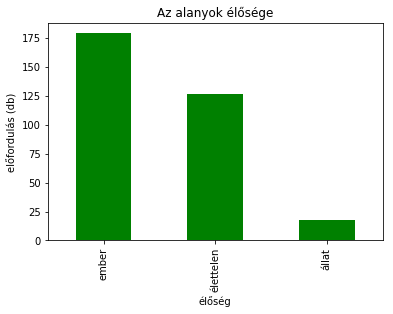

In [13]:
print_data = data['S_live'].value_counts()
print('az ige alanyai élőség szempontjából (db): ', print_data)

plt.title('Az alanyok élősége')
plt.xlabel('élőség')
plt.ylabel('előfordulás (db)')
ax = print_data.plot.bar(color='green')

#### 4) Az alany szófaja
A korpusz példáiban a főnévi (vagy np-vel kifejezett) alany volt a leggyakoribb (199 db), ezt a zéró anaforával kódolt (83db), valamint a személyes névmással (33 db) kifejezett alany követte. Kis számban előfordult határozatlan, vonatkozó, visszaható névmás is. 

Az 'ül', 'él', 'inaktív' és a modifikátori használatnál 60-70%-ban folytatólagos S (=zéró anafora vagy szem. névmás) volt, de a 'van' esetében összesen 7,1%-ban volt ilyen. Ezen felül vannak a lokatív mondatok, mert azok is folytatólagos alanyok (ami így 48 db tiszta, 54 vegyes (='van/ül' jelentéssel együtt) - vagyis 16,7%, az összes 'van' 49%-a.Viszont a folytatólagos S-ek nagyja is NP-vel van kódolva. 

Két jelentésből ('tesz', 'elrendeződik') nem volt elég példa az értékeléshez. 

az alanyt kódoló token szófaja (db):  np                    199
zero                   83
pro (szem)             33
pro (határozatlan)      6
pro (von)               2
pro (vissz)             1
Name: S_POS, dtype: int64
az alanyt kódoló token szófaja a különféle szerkezetekben (db):  cons     S_POS             
egz      np                    61
egz/sim  np                    10
ger      zero                   6
         np                     4
         pro (szem)             1
hal      zero                  26
         pro (szem)             9
         np                     5
kop      np                    17
         pro (szem)             1
         pro (von)              1
         zero                   1
kop/sim  np                     2
loc      np                    44
         zero                   5
         pro (határozatlan)     1
         pro (vissz)            1
loc/sim  np                     5
         pro (határozatlan)     1
         pro (szem)             1
pár    

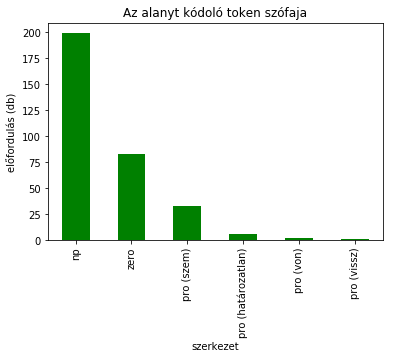

In [14]:
print_data = data['S_POS'].value_counts()
print('az alanyt kódoló token szófaja (db): ', print_data)

plt.title('Az alanyt kódoló token szófaja')
plt.xlabel('szerkezet')
plt.ylabel('előfordulás (db)')
ax = print_data.plot.bar(color='green')

print_data = data.groupby('cons')
print_data = print_data['S_POS'].value_counts()
print('az alanyt kódoló token szófaja a különféle szerkezetekben (db): ', print_data)

print_data = data.groupby('V_meaning')
print_data = print_data['S_POS'].value_counts()
print('az alanyt kódoló token szófaja a különféle szerkezetekben (db): ', print_data)

#### 5) Az igealak
A korpuszban nem fordult elő egyetlen passzív vagy tárgyas ragozású alak sem. Meg tudom nézni az időt, illetve fontosabb a képzett igealako száma és milyensége.
##### 1) Idő
Az idő tekintében a korpuszban gyakoribb volt a jelen idejű 'ül', mint a múlt idejű, ez azonban természetesen csak érdekesség, információértéke nincs.

az ige ideje (db):  prs    230
pst     94
Name: V_time, dtype: int64


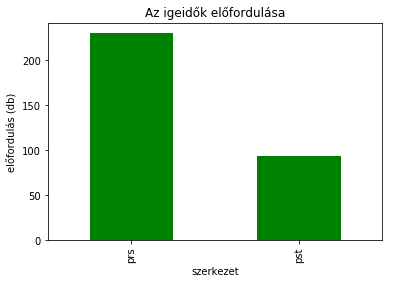

In [15]:
print_data = data['V_time'].value_counts()
print('az ige ideje (db): ', print_data)

plt.title('Az igeidők előfordulása')
plt.xlabel('szerkezet')
plt.ylabel('előfordulás (db)')
ax = print_data.plot.bar(color='green')

##### 2) Képzők
Az előfordulások 18,8%-ában képzővel ellátott ige szerepelt. A leggyakrabban a _-xol-_ (47db), majd az _-nt-_ (16db) képző jelent meg.

felbukkant igeképzők (db):  xol    47
nt     16
Name: V_deriv, dtype: int64
speaker  Hatanjev, Pjotr  Hozumova, Valentina  Merova, Tamara  \
V_deriv                                                         
nt                   1.0                  5.0             6.0   
xol                  2.0                  0.0             1.0   

speaker  Rombandejeva, Svetlana  Vasiljeva, Valentina  Algadjeva, Anna  \
V_deriv                                                                  
nt                          1.0                   2.0              0.0   
xol                        20.0                   3.0              1.0   

speaker  Dinislamova, Svetlana   Hozumova, Svetlana  Kondina, Galina  \
V_deriv                                                                
nt                          0.0                 0.0              0.0   
xol                         1.0                 3.0              2.0   

speaker  Kugin, Pjotr  Matvejeva, Svetlana  Merov, Nikolay  \
V_deriv        

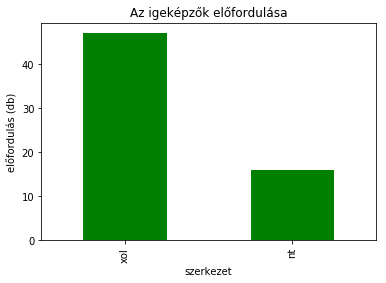

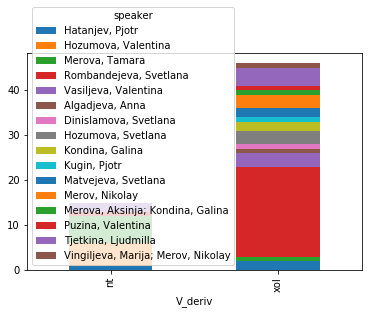

In [16]:
print_data = data['V_deriv'].value_counts()
print('felbukkant igeképzők (db): ', print_data)

plt.title('Az igeképzők előfordulása')
plt.xlabel('szerkezet')
plt.ylabel('előfordulás (db)')
ax = print_data.plot.bar(color='green')

chart_data = data.groupby(['V_deriv', 'speaker'])['V_deriv'].count().unstack('speaker').fillna(0)
ax = chart_data.plot.bar(stacked=True)
print(chart_data)

A stílusok és a képzők megjelensének gyakorisága pedig:

In [17]:
print_data = data.groupby('style')
print_data = print_data['V_deriv'].value_counts()
print('felbukkant igeképzők (db): ', print_data)

felbukkant igeképzők (db):  style  V_deriv
besz   xol         1
mese   xol         4
       nt          2
pub    xol        42
       nt         14
Name: V_deriv, dtype: int64


## Az _ӯнлы_ jelentései és ezek összefüggései
Az igének összesen 7 jelentését annotáltam, valamint ezek kombinációit. Ezek a jelentések: 

**1)** mindegyike megjelenik-e a különböző **stílusokban** és ha igen, találni-e eltérést a jelentések relatív gyakoriságukban? 

**2)** mindegyike megjelenik-e több **beszélőnél** is vagy van ok egyéni nyelvhasználatra gyanakodni? Vannak szerzők, akik rengetegszer használják az igét. Vajon ők mindig ugyanabban a pár jelentésben alkalmazzák?

**3)** hol állnak a **grammatikalizációs folyamat**ban? Mennyire erősen érezhető az ige alapjelentése az egyes előfordulásokban? Vannak erősebben grammatikalizálódottabb jelentések és kevésbé azok?

**4)** mindegyike azonos métékben használható **élő és élettelen** alanyokkal? Ha nem, melyek térnek el?

**5)** mindegyike azonos módon használható **zéró, pro anaforával és np**-vel? 

**6)** mindegyike előfordul-e **igeképzős** alakkal? Mit ad hozzá a jelentéshez a képző?

**7)** a **szövegkörnyezet** (konkrétan a létige megjelenése) hatása kimutatható-e egyes jelentéseknél?
### 1) A különböző jelentések megjelenése a stílusokban
Vajon vannak 1) stílusfüggő (=csak itt felbukkanó) jelentések? 2) van eltérés mennyiségileg a jelentések előfordulásában? 

A stílusoknál 2 **jelentés** van, ahol kimondható, hogy **az újságcikkekben nagyobb arányban fordulnak elő**, mint a mesékben. Ha az összes mese+cikk példát vesszük 100%-nak, akkor nagyarnyú az eltérés:

1) 'inaktív' - 2x annyi van az újságokban, mint a mesékben, viszont 12 vs 6-ról beszélünk
2) az 'él' - példáinak 60%-a származik a cikkekből és ennek csupán harmada a mesékben, viszont 6db vs 2db előfordulásról van szó, szóval ez nem tekinthető megbízható értéknek, túl kevés a példa.

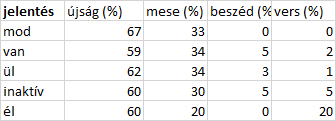

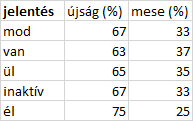

A másik oldalról, ha az egyes **stílusokban nézzük a jelentések eloszlását**, gyakorlatilag nem találunk különbséget: a 'van' vs 'ül' jelentés között a cikkekben 7,2%, a mesékben 10,1% különbség van a 'van' javára.
 
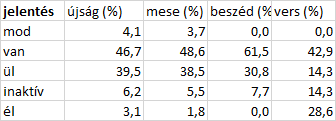

A stílusokban megjelenő jelentések előfordulása:  V_meaning     style
elrendezõdik  mese      2
inaktív       pub      11
              mese      4
              vers      1
inaktív/ül    mese      3
              pub       2
              besz      1
mod           pub       9
              mese      3
van           pub      84
              mese     39
              besz      7
              vers      2
van/ül        mese     14
              pub       6
              besz      1
              vers      1
él            pub       6
              mese      2
              vers      2
ül            pub      39
              mese     19
              besz      2
ül/idõt tölt  pub      31
              mese      3
              besz      2
              vers      1
ül/inaktív    mese      9
              pub       4
ül/van        mese     11
              pub       3
Name: style, dtype: int64


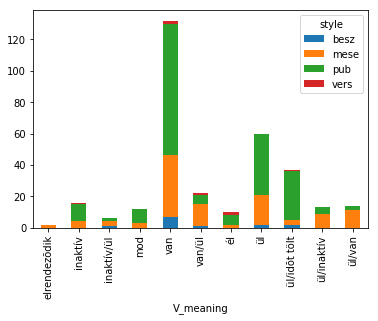

In [18]:
print_data = data.groupby('V_meaning')
print("A stílusokban megjelenő jelentések előfordulása: ", print_data['style'].value_counts())

chart_data = data.groupby(['V_meaning', 'style'])['V_meaning'].count().unstack('style').fillna(0)
ax = chart_data.plot.bar(stacked=True)

### 2) A különböző jelentések megjelenése a beszélőknél
A különböző jelentések hány beszélőnél jelennek meg? 

A stílusokban megjelenő jelentések előfordulása:  V_meaning_simple  speaker                         
elrendezõdik      Dvinjaninova, Marija                 1
                  Sambindalova, Darja                  1
inaktív           Hozumova, Valentina                  4
                  Algadjeva, Varvara                   2
                  Hatanjev, Pjotr                      2
                  Merova, Tamara                       2
                  Rombandejeva, Svetlana               2
                  Tjetkina, Ljudmilla                  2
                  Algadjeva, Ljudmila                  1
                  Anjamova, Aleksandra                 1
                  Bahtjarova, Tatjana                  1
                  Hatanjeva, Tamara                    1
                  Kugin, Pjotr                         1
                  Merov, Nikolay                       1
                  Rukova, Uljana                       1
mod               Merova, Tamara            

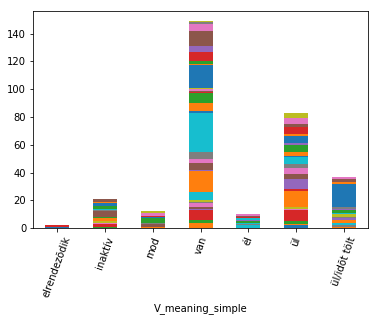

A példákban szerplő jelentések a 10-nél több példát közőknél:  speaker                 V_meaning_simple
Algadjeva, Varvara      ül                   8
                        van                  7
                        inaktív              2
Dinislamova, Svetlana   van                  6
                        él                   2
                        ül/idõt tölt         2
Hatanjev, Pjotr         van                 15
                        ül                  12
                        inaktív              2
                        ül/idõt tölt         2
Hozumova, Valentina     van                  5
                        inaktív              4
                        ül                   4
                        mod                  2
Kugin, Pjotr            van                  5
                        ül                   3
                        inaktív              1
                        mod                  1
                        él                   1
   

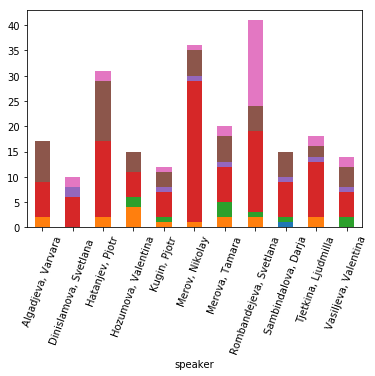

In [19]:
print_data = data.groupby('V_meaning_simple')
print("A stílusokban megjelenő jelentések előfordulása: ", print_data['speaker'].value_counts())

chart_data = data.groupby(['V_meaning_simple', 'speaker'])['V_meaning_simple'].count().unstack('speaker').fillna(0)
ax = chart_data.plot.bar(stacked=True, legend=None)
ax.tick_params(axis='x', rotation=70)
plt.show()

speakers = data['speaker'].value_counts().reset_index(name='count').query('count >= 10')['index']
list = speakers.tolist()

print_data = data[data['speaker'].isin(list)]

speaker_data = print_data.groupby('speaker')
print("A példákban szerplő jelentések a 10-nél több példát közőknél: ", 
      speaker_data['V_meaning_simple'].value_counts())

chart_data = print_data.groupby(['V_meaning_simple', 'speaker'])['speaker'].count().unstack('V_meaning_simple').fillna(0)
ax = chart_data.plot.bar(stacked=True, legend=None)
ax.tick_params(axis='x', rotation=70)
plt.show()

Azok a beszélők, akik **10-nél több pédával szolgáltak, milyen jelentésekben** használták az igét? 

A 10 több példát közlő informánsok által használt jelentések előfordulása:  speaker                 V_meaning   
Algadjeva, Varvara      van              4
                        van/ül           3
                        ül               3
                        ül/inaktív       3
                        inaktív/ül       2
                        ül/van           2
Dinislamova, Svetlana   van              5
                        él               2
                        ül/idõt tölt     2
                        van/ül           1
Hatanjev, Pjotr         van             13
                        ül               8
                        ül/inaktív       3
                        van/ül           2
                        ül/idõt tölt     2
                        inaktív          1
                        inaktív/ül       1
                        ül/van           1
Hozumova, Valentina     van              5
                        inaktív          4
                        ül 

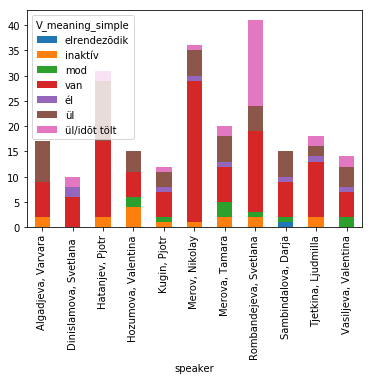

In [20]:
speakers = data['speaker'].value_counts().reset_index(name='count').query('count >= 10')['index']
list = speakers.tolist()

print_data = data[data['speaker'].isin(list)]

speaker_data = print_data.groupby('speaker')
print("A 10 több példát közlő informánsok által használt jelentések előfordulása: ", 
      speaker_data['V_meaning'].value_counts())

print("Az 8-nál több példát közlő informánsok által használt jelentések előfordulása (egyszerű): ", 
      speaker_data['V_meaning_simple'].value_counts())

chart_data = print_data.groupby(['V_meaning_simple', 'speaker'])['speaker'].count().unstack('V_meaning_simple').fillna(0)
ax = chart_data.plot.bar(stacked=True)


### 3) A különböző jelentések grammatikaikalizációs pozíciója
Mi a helyzet a különböző jelentések és az ige elsődleges jelentésének kapcsolatával? 
_Az annotálás során t-vel jelöltem az ige elsődleges, 'ül' jelentését, n-el, ha szinte nem vagy nehezen elválasztható volt az elsődleges és a másodlagos jelentés, k-val, ha már csak részben volt érezhető az előfordulás során az 'ül' jelentéstartalom és s-el, ha már meg sem jelent (pl. minden élettelen alany esetén s-t jelöltem)._

A jelentések és az elsődleges jelentés kapcsolatának gyakorisága:  V_meaning     gram
elrendezõdik  s         2
inaktív       s        12
              k         4
inaktív/ül    k         2
              n         2
              s         2
mod           n         9
              k         3
van           s       125
              k         7
van/ül        n        15
              k         5
              t         2
él            s         8
              k         2
ül            t        58
              n         1
              s         1
ül/idõt tölt  n        37
ül/inaktív    n        11
              k         2
ül/van        n        13
              s         1
Name: gram, dtype: int64


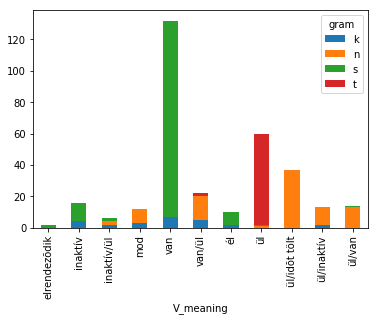

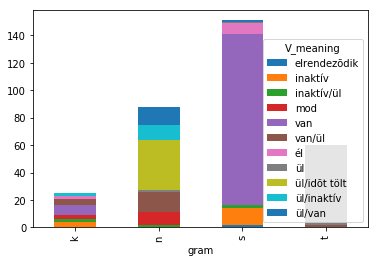

In [21]:
print_data = data.groupby('V_meaning')
print("A jelentések és az elsődleges jelentés kapcsolatának gyakorisága: ", 
      print_data['gram'].value_counts())

chart_data = data.groupby(['V_meaning', 'gram'])['V_meaning'].count().unstack('gram').fillna(0)
ax = chart_data.plot.bar(stacked=True)

chart_data = data.groupby(['V_meaning', 'gram'])['gram'].count().unstack('V_meaning').fillna(0)
ax = chart_data.plot.bar(stacked=True)

### 4) A jelentések és az alany élő/élettelen voltának kapcsolata
Az egyes jelentések más típusú alanyt követelnek meg. De vajon van 'van' jelentésű ige élő alannyal is? 

A jelentések és az az alany +élő attributumának gyakorisága:  V_meaning     S_live   
elrendezõdik  élettelen      2
inaktív       ember         12
              élettelen      4
inaktív/ül    ember          6
mod           ember         12
van           élettelen    120
              ember         10
              állat          2
van/ül        ember         15
              állat          6
              élettelen      1
él            ember          9
              állat          1
ül            ember         55
              állat          5
ül/idõt tölt  ember         37
ül/inaktív    ember         13
ül/van        ember         10
              állat          4
Name: S_live, dtype: int64
A jelentések és az az alany +élő attributumának gyakorisága:  V_meaning_simple  S_live   
elrendezõdik      élettelen      2
inaktív           ember         18
                  élettelen      4
mod               ember         12
van               élettelen    121
                  ember         2

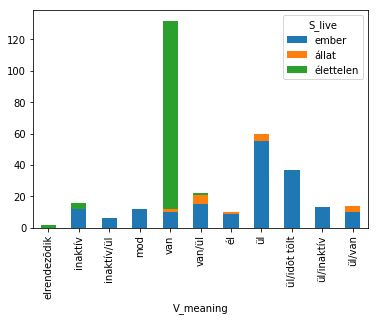

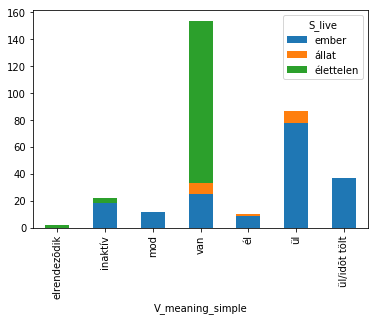

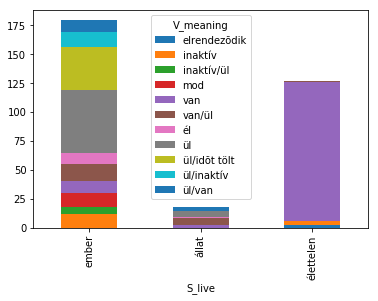

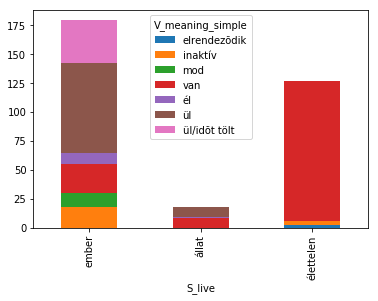

In [22]:
print_data = data.groupby('V_meaning')
print("A jelentések és az az alany +élő attributumának gyakorisága: ", 
      print_data['S_live'].value_counts())

chart_data = data.groupby(['V_meaning', 'S_live'])['V_meaning'].count().unstack('S_live').fillna(0)
ax = chart_data.plot.bar(stacked=True)

chart_data = data.groupby(['V_meaning_simple', 'S_live'])['V_meaning_simple'].count().unstack('S_live').fillna(0)
ax = chart_data.plot.bar(stacked=True)

chart_data = data.groupby(['V_meaning', 'S_live'])['S_live'].count().unstack('V_meaning').fillna(0)
ax = chart_data.plot.bar(stacked=True)

chart_data = data.groupby(['V_meaning_simple', 'S_live'])['S_live'].count().unstack('V_meaning_simple').fillna(0)
ax = chart_data.plot.bar(stacked=True)

print_data = data.groupby('V_meaning_simple')
print("A jelentések és az az alany +élő attributumának gyakorisága: ", 
      print_data['S_live'].value_counts())

### 5) A jelentések és az alany szófajának kapcsolata
Milyen szófajjal van kódolva az alany a különböző jelentéseknél? Mindenhol működik a zéró anafora vagy a névmás? Hol nem?

A jelentések és az az alany +élő attributumának gyakorisága:  V_meaning     S_POS             
elrendezõdik  np                      2
inaktív       np                      7
              zero                    6
              pro (szem)              2
              pro (határozatlan)      1
inaktív/ül    zero                    4
              pro (szem)              2
mod           zero                    6
              np                      4
              pro (szem)              2
van           np                    122
              zero                    6
              pro (határozatlan)      1
              pro (szem)              1
              pro (vissz)             1
              pro (von)               1
van/ül        np                     17
              zero                    3
              pro (határozatlan)      1
              pro (szem)              1
él            pro (szem)              4
              np                      3
              zero       

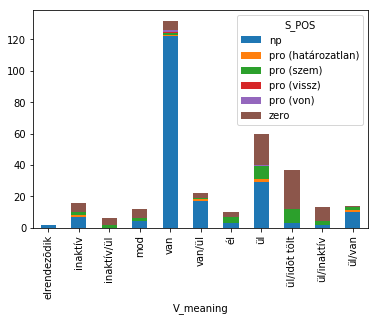

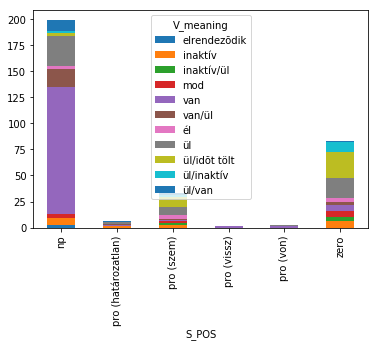

In [23]:
print_data = data.groupby('V_meaning')
print("A jelentések és az az alany +élő attributumának gyakorisága: ", 
      print_data['S_POS'].value_counts())

chart_data = data.groupby(['V_meaning', 'S_POS'])['V_meaning'].count().unstack('S_POS').fillna(0)
ax = chart_data.plot.bar(stacked=True)

chart_data = data.groupby(['V_meaning', 'S_POS'])['S_POS'].count().unstack('V_meaning').fillna(0)
ax = chart_data.plot.bar(stacked=True)

### 6) A különböző jelentések és a képzők kapcsolata

A jelentések és az az alany +élő attributumának gyakorisága:  V_meaning     V_deriv
inaktív       nt          2
              xol         2
inaktív/ül    xol         1
mod           nt          6
              xol         2
van           nt          1
van/ül        xol         3
ül            xol        12
              nt          5
ül/idõt tölt  xol        27
ül/inaktív    nt          2
Name: V_deriv, dtype: int64


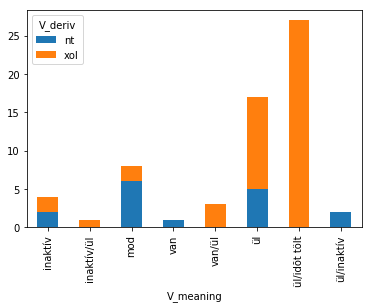

In [ ]:
print_data = data.groupby('V_meaning')
print("A jelentések és az az alany +élő attributumának gyakorisága: ", 
      print_data['V_deriv'].value_counts())

chart_data = data.groupby(['V_meaning', 'V_deriv'])['V_meaning'].count().unstack('V_deriv').fillna(0)
ax = chart_data.plot.bar(stacked=True)

chart_data = data.groupby(['V_meaning', 'V_deriv'])['V_deriv'].count().unstack('V_meaning').fillna(0)
ax = chart_data.plot.bar(stacked=True)

chart_data = data.groupby(['V_meaning_simple', 'V_deriv'])['V_meaning_simple'].count().unstack('V_deriv').fillna(0)
ax = chart_data.plot.bar(stacked=True)

chart_data = data.groupby(['V_meaning_simple', 'V_deriv'])['V_deriv'].count().unstack('V_meaning_simple').fillna(0)
ax = chart_data.plot.bar(stacked=True)

### 7) A jelentések és a szövegkörnyezet kapcsolata
Annotálás közben feltűnt, hogy az újságcikkekben elég gyakori az _oli_ létige és talán a létige közelsége hatással lehet a 'van' jelentésű használatra: annak érdekében, hogy a szerző elkerülje a szóismétlést, másik igét választ. Vajon igaz ez?
Azt látjuk, hogy 
- az össz van jelentésű ige (143 db előfordulás) 57%-ában (82 db) találni az ige környezetében létigét, 27%-ában a megelőző és a követő 3 mondaton belül is. 

In [ ]:
oli_data = data[data['V_meaning'] == 'van']
oli_data = oli_data.groupby('oli')
print("A a létige megjelenése a 'van' jelentésű unli ige közelében: ", 
      oli_data['oli'].value_counts())



Összevetésül nézzük, hogy **az összes jelentés** esetén mi a helyzet:

In [ ]:
print_data = data.groupby('V_meaning')
print("A jelentések és a létige megjelenése: ", print_data['oli'].value_counts())

chart_data = data.groupby(['V_meaning', 'oli'])['V_meaning'].count().unstack('oli').fillna(0)
ax = chart_data.plot.bar(stacked=True)

chart_data = data.groupby(['V_meaning', 'oli'])['oli'].count().unstack('V_meaning').fillna(0)
ax = chart_data.plot.bar(stacked=True)

A stílusok hatása

In [ ]:
print_data = data.groupby(['style', 'V_meaning'])
print("A jelentések és a létige megjelenése: ", print_data['oli'].value_counts())

chart_data = data.groupby(['style', 'V_meaning', 'oli'])['V_meaning'].count().unstack('oli').fillna(0)
ax = chart_data.plot.bar(stacked=True)

chart_data = data.groupby(['style', 'V_meaning', 'oli'])['oli'].count().unstack('V_meaning').fillna(0)
ax = chart_data.plot.bar(stacked=True)

In [ ]:
print_data = data[data['style'] == 'pub']
print_data = print_data.groupby(['style', 'V_meaning'])
print("A jelentések és a létige megjelenése: ", print_data['oli'].value_counts())

### A **'van'** jelentés további analízise


In [ ]:
print_data = data[data['V_meaning_simple'] == 'van']
print_data = print_data.groupby('cons')
print_data = print_data['S_hun'].value_counts()
print('az egyes jelentéstartalmak példáinak száma (db): ', print_data)

plt.title('A van jelentésű előfordulások alanyai')
plt.xlabel('szerkezet')
plt.ylabel('előfordulás (db)')
ax = print_data.plot.bar(color='green')

A 'van' jelentést közlő beszélők

In [ ]:
print_data = data[data['V_meaning'] == 'van']
print_data = print_data.groupby('V_meaning_simple')
print("A stílusokban megjelenő jelentések előfordulása: ", print_data['speaker'].value_counts())